In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

from kuaizi.display import display_single
from astropy.io import fits
from astropy.table import Table, hstack
import astropy.units as u

In [2]:
import sys
sys.path.append('/home/jiaxuanl/Research/Merian/carpenter/src/')
from carpenter.cutout import generate_cutout

In [6]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/projects/MERIAN/repo/', collections='DECam/runs/merian/dr1_wide')

In [41]:
ra = 149.75967981967491
dec = 2.640111627283772

img, psf, _ = generate_cutout(butler, 'hsc_rings_v1', 
                              ra, dec, 
                              half_size=30 * u.arcsec,
                              band='N540', data_type='deepCoadd_calexp',
                              psf=True)

### Display the cutout

In [42]:
import lsst.geom as geom
import lsst.afw.display as afwDisplay

In [43]:
display.getMaskPlaneColor()

{'BAD': 'red',
 'CR': 'magenta',
 'EDGE': 'yellow',
 'INTERPOLATED': 'green',
 'SATURATED': 'green',
 'DETECTED': 'blue',
 'DETECTED_NEGATIVE': 'cyan',
 'SUSPECT': 'yellow',
 'NO_DATA': 'orange',
 'INTRP': 'green',
 'SAT': 'green',
 'CLIPPED': 'red',
 'CROSSTALK': 'green',
 'INEXACT_PSF': 'blue',
 'NOT_DEBLENDED': 'cyan',
 'REJECTED': 'magenta',
 'SENSOR_EDGE': 'yellow',
 'STREAK': 'orange',
 'UNMASKEDNAN': 'red'}

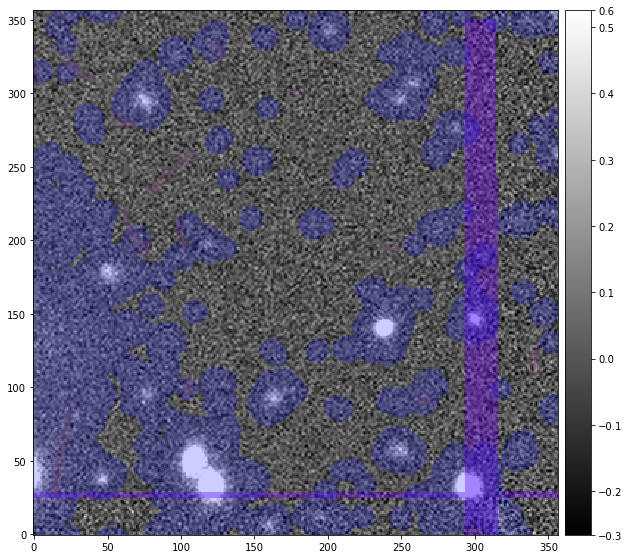

In [44]:
afwDisplay.setDefaultBackend('matplotlib')
fig, ax = plt.subplots(figsize=(10, 10))
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.setMaskTransparency(80)
# for key in display.getMaskPlaneColor().keys():
#     display.setMaskPlaneColor(key, 'IGNORE')
# display.setMaskPlaneColor('NO_DATA', 'cyan')
# display.setMaskPlaneColor('DETECTED', 'blue')

display.mtv(img)

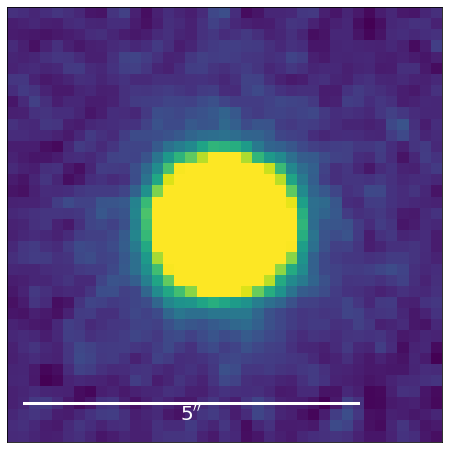

In [33]:
display_single(psf.array); # PSF model